In [1]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import os
import sys
import json

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

from src.api import ApiClient
from src.utils import *
from src.const import *
from src.plots import *
from src.signal_providers.signal_manager import *
from src.news_providers.news_api_provider import *

%load_ext autoreload
%autoreload 2

sns.set_theme(style="darkgrid")

In [4]:
client = ApiClient()

In [5]:
client.create(
    [
        client.make_msg(
            "You are image descripto. Respond with json of this format: {'description': what you see, 'style': stylistics of the image}",
            role=ROLE_SYSTEM,
        ),
        client.make_msg(
            text="What's in this image?",
            img="https://cdn.midjourney.com/ca13f713-b289-45ee-92fe-b1276a1dc833/0_3.webp",
        ),
    ],
    format=JSON_MODE,
)

'{"description": "The image features an animated female character with bright red hair and striking blue eyes. She is wearing a black bikini, positioned in an alluring pose with one arm raised above her head. The background is a simple and soft blue, which nicely complements the vibrant red of her hair, creating a visually striking contrast.", "style": "The artwork is rendered in a highly detailed, realistic style with a strong focus on vibrant colors and smooth shading. The character\'s expression and pose are lively and engaging, typical of modern digital illustrations aimed at a youthful audience."}'

In [6]:
plt.plot(np.sin(np.array(range(300)) * 0.1))

client.create(
    [
        client.make_msg(
            "You are image descripto. Respond with json of this format: {'description': what you see, 'style': stylistics of the image}",
            role=ROLE_SYSTEM,
        ),
        client.make_msg(
            text="What's in this image?",
            img=plt,
        ),
    ],
    format=JSON_MODE,
)

'{\n  "description": "The image displays a sinusoidal wave pattern plotted on a coordinate grid. The horizontal axis is labeled with numbers ranging from 0 to 300 at intervals of 50, while the vertical axis ranges from -1.00 to 1.00, marked at intervals of 0.25. The wave oscillates evenly above and below a horizontal line at y = 0.",\n  "style": "Analytical, graphical representation of data. The graph uses a simple color scheme with a blue wave on a light gray grid background."\n}'

In [22]:
day_history = get_day_history("TON")
week_history = get_week_history("TON")
month_history = get_month_history("TON")

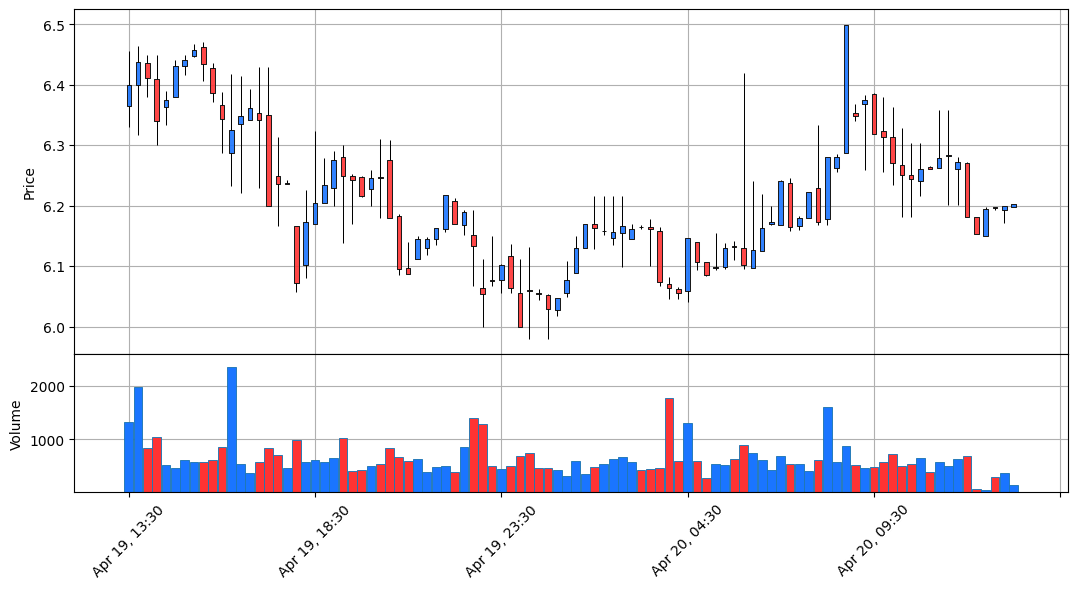

In [27]:
make_candlebars(day_history)

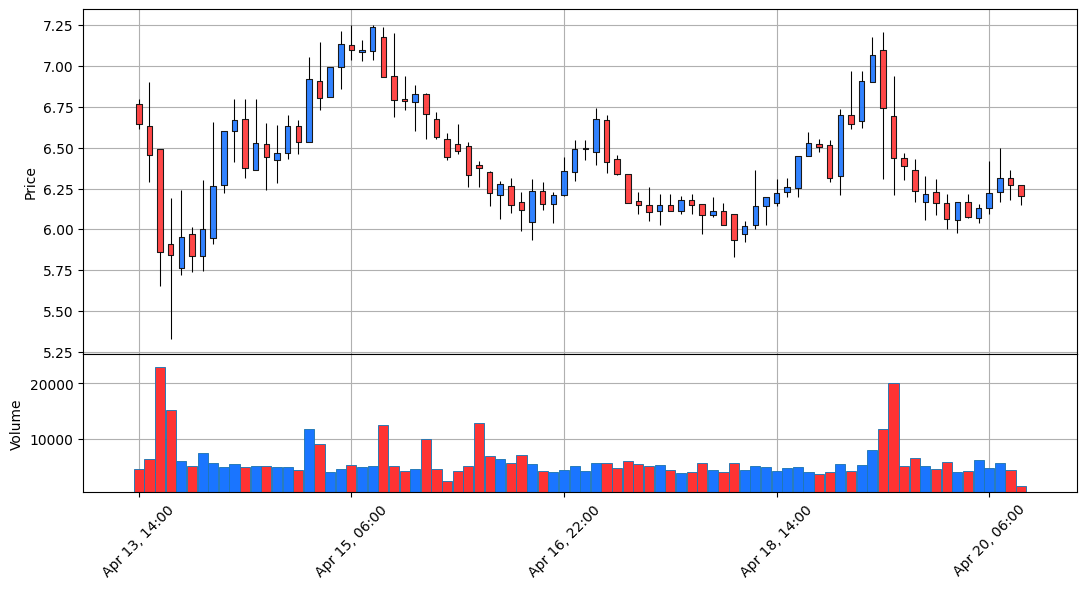

In [28]:
make_candlebars(week_history)

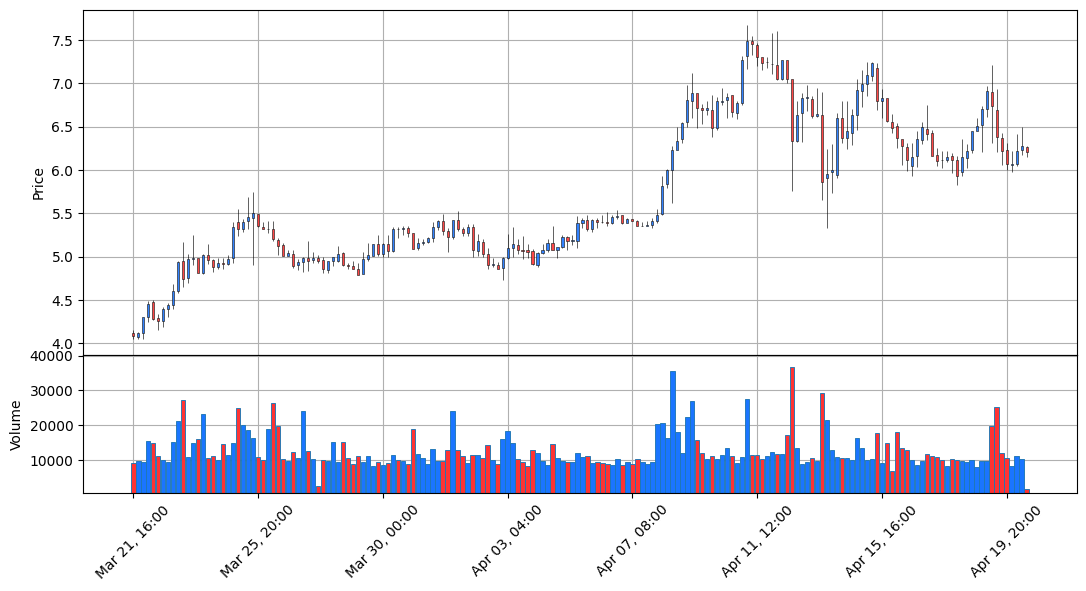

In [29]:
make_candlebars(month_history)

In [30]:
napi = NewsApi()
news = napi.get_news("ton+coin", start_date="2024-04-15")

filtered_news = client.create(
    [
        client.make_msg(
            """You are news manager, you validate and summarize reliable news relevant to the topic.
           
            Respond with json of this format: 
            {
                'headlines': most trending headlines, 
                'sentiment': general sentiment on the market about the topic,
                'description': detailed summary of relevant news,
            }
            """,
            role=ROLE_SYSTEM,
        ),
        client.make_msg(
            text="""
            These are the news about the TON coin for the last week:
            {news}
            
            Analyze and extract data relevant to cryptocurrencies and TON coin. Pay attention to anything fresh that could affect the market
            """.format(news=str(news)),
        ),
    ],
    format=JSON_MODE,
)

json.loads(filtered_news)

{'headlines': ['Toncoin Defies Market Turmoil, Surges 25% To Tally All-Time High',
  'TON Foundation Launches Memelandia To Drive Institutions into Meme Coins',
  'TON’s 10% rise in 24 hours allows it to flip DOGE, but the race isn’t over',
  'Toncoin And WIF Beat Out Dogecoin, Shiba Inu To Clinch Title For Best Perfoming Altcoins'],
 'sentiment': 'Positive',
 'description': "Toncoin (TON) has demonstrated remarkable resilience and performance over the past week. It achieved a new milestone by reaching an all-time high price of $7.0, marking a 25% increase amidst market turbulence. This surge has propelled Toncoin to become the eighth largest cryptocurrency by market cap, surpassing Dogecoin (DOGE). In addition to financial performance, TON Foundation has initiated 'Memelandia', a new strategic push to attract institutional interest into the meme coin sector. These factors combined indicate a robust and growing market confidence in Toncoin, making it a standout performer in the volatil

In [32]:
day_buf = make_candlebars(day_history, useBuf=True)
week_buf = make_candlebars(week_history, useBuf=True)
month_buf = make_candlebars(month_history, useBuf=True)

response = client.create(
    [
        client.make_msg(
            """You are professional trader.
            You have deep knowledge of cryptocurrencies and trading markets, and you can maximize profits the most efficiently.
            You trade in USDT.
            
            You an only buy or sell at the current price, you can not set stop loss.
            Respond with json of this format: 
            {
                'description': what you see on charts, general short and long term trends, 
                'trend_analysys': rough prediction of near future development of coin,
                'techical_analysys': visual technical analysis of plot and indicators,
                'optimal_strategy": optimal trading strategy to maximize profits in this situation,
                'final_decision': what to do, possible variants: 'sell', 'buy', 'hold' (do nothing),
                'amount': USDT amount of coin to byu or sell, 0 if action is 'hold'
            }
            """,
            role=ROLE_SYSTEM,
        ),
        client.make_msg(
            text="This is price history of this coin in the last day",
            img=day_buf,
        ),
        client.make_msg(
            text="This is price history of this coin in the last week",
            img=week_buf,
        ),
        client.make_msg(
            text="This is price history of this coin in the last month",
            img=month_buf,
        ),
        client.make_msg(
            text="""This is news related to this coin from the last week: {news}""".format(news=str(filtered_news)),
        ),
        client.make_msg(
            text="""
            This is price charts of TON coin, you need to come up with optimal strategy at this moment.
            Permorm price and signal analisys of this graph of this crypto coin.
            
            your current funds:
            {
                TON: 34.73,
                USDT: 56.14
            }
            """,
        ),
    ],
    format=JSON_MODE,
)

json.loads(response)

{'description': "The price of Toncoin (TON) has experienced significant variability over the past month, moving from below $5.0 up to a peak of around $7.0. This surge in price corresponds with the positive news regarding its performance and engagement initiatives like 'Memelandia'. The recent achievement of an all-time high suggests sustained investor interest and optimism around Toncoin's market positions. Over the past week, despite some downward trends, the overall sentiment and momentum have remained strong. Looking at the day chart, the price seems to be stabilizing in the $6.1 to $6.5 range.",
 'trend_analysis': 'Given the recent positive news, there is a strong possibility that the price of Toncoin may continue to fluctuate within the current range or potentially increase once more if the positive sentiment persists around its market movements and innovations. The formation of higher lows on the weekly chart supports a slightly bullish outlook in the medium term.',
 'technical_